# Основы визуализации данных с помощью Matplotlib

## Домашнее задание 

### Цель домашнего задания

Отработать навык визуализации данных с помощью простых графиков matplotlib. Научиться использовать визуализацию данных для проверки гипотез и валидации данных

### Описание домашнего задания и формат сдачи

Вам предстоит выполнить задачи по визуализации данных. Для этого  впишите свой код в ячейки после комментария `### YOUR CODE HERE ###` и сохраните изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку преподавателю.

**Важно учесть:** У всех графиков обязательно должен присутствовать заголовок и подписи осей. Убедитесь, что все метки и подписи осей читаемы.

#### Описание данных

Для выполнения домашнего задания необходимо использовать датасет `vgsales.csv`, загрузка которого будет приведена ниже. Этот датасет содержит информацию о суммарных продажах видеоигр для игровых консолей. Описание признаков:
* `Rank` - порядковый номер записи в датасете
* `Name` - наименование игры
* `Platform` - платформа, для которой выпущена игра (Nintendo, PlayStation, XBox и др.)
* `Year` - год выпуска игры
* `Genre` - жанр игры
* `Publisher` - наименование компании-издателя игры
* `NA_Sales` - объем продаж игры в Северной Америке, млн. копий
* `EU_Sales` - объем продаж игры в Европе, млн. копий
* `JP_Sales` - объем продаж игры в Японии, млн. копий
* `Other_Sales` - объем продаж игры в остальных странах, млн. копий
* `Global_Sales` - объем продаж игры по всему миру, млн. копий

### Критерии оценки

**"Зачет"** - выполнены задачи 1-9, каждый график отформатирован и читаем

**"На доработку"** - выполнены не все обязательные задачи или какой-либо из график не читаем или не подписан

### Рекомендации по выполнению

* Библиотеки, которые необходимы для выполнения домашнего задания, перечислены в ячейке ниже.
* Подсказка по работе с Jupyter: если перед графиком выводится слишком много текста, поставьте ';' в конце последней строки ячейки

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Загрузка данных

In [27]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Задача 1

Постройте гистограмму распределения объема продаж всех игр в Японии

([<matplotlib.axis.XTick at 0x1d0f713c430>,
 <a list of 11 Text major ticklabel objects>)

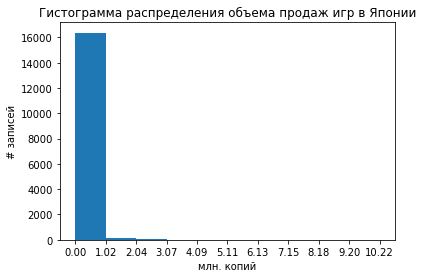

In [25]:
df1 = df['JP_Sales']
bin_width = df1.max() / 10
x_range = [i * bin_width for i in range(11)]
plt.hist(df1)
plt.title("Гистограмма распределения объема продаж игр в Японии")
plt.ylabel('# записей')
plt.xlabel('млн. копий')
plt.xticks(x_range)

### Задача 2

Постройте столбчатую диаграмму (barchart), показывающую сравнение общемирового объема продаж игры "Grand Theft Auto V" на разных платформах

Text(0.5, 0, 'Платформа')

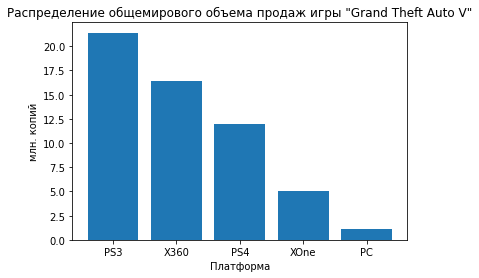

In [72]:
df2 = df[df['Name'] == 'Grand Theft Auto V']
plt.bar(df2['Platform'], df2['Global_Sales'])
plt.title('Распределение общемирового объема продаж игры "Grand Theft Auto V"')
plt.ylabel('млн. копий')
plt.xlabel('Платформа')

### Задача 3

Постройте линейный график динамики суммарных общемировых продаж всех игр по годам

Text(0.5, 0, 'Год')

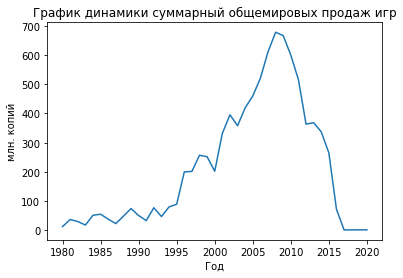

In [161]:
df3 = df.groupby('Year')['Global_Sales'].sum()
plt.plot(df3)
plt.title('График динамики суммарный общемировых продаж игр')
plt.ylabel('млн. копий')
plt.xlabel('Год')

### Задача 4

Постройте точечную диаграмму, показывающую существование зависимости продаж во всем мире от продаж в Северной Америке

Text(0.5, 0, 'Год')

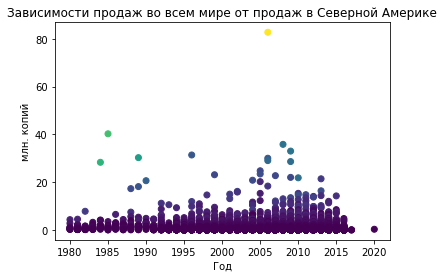

In [121]:
# df4 = df.groupby('Year')['NA_Sales'].sum()
# df4
plt.scatter(df['Year'], df['Global_Sales'], c = df['NA_Sales'])
plt.title('Зависимости продаж во всем мире от продаж в Северной Америке')
plt.ylabel('млн. копий')
plt.xlabel('Год')

Text(0.5, 0, 'Год')

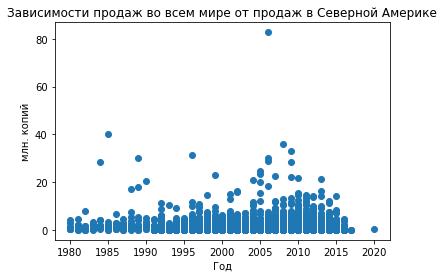

In [122]:
# для сравнения

plt.scatter(df['Year'], df['Global_Sales'])
plt.title('Зависимости продаж во всем мире от продаж в Северной Америке')
plt.ylabel('млн. копий')
plt.xlabel('Год')

### Задача 5

Постройте круговую диаграмму процентного соотношения продаж игры "Super Mario Bros." на разных платформах во всем мире. Подпишите доли графика с точностью 1 знак после запятой.

Text(0.5, 1.0, 'Соотношение продаж игры "Super Mario Bros." на разных платформах')

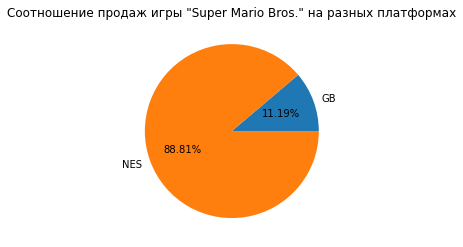

In [98]:
df5 = df[df['Name'] == 'Super Mario Bros.']
df5 = df5.groupby('Platform')['Global_Sales'].sum()
df5
plt.pie(df5, labels = df5.index, autopct='%1.2f%%')
plt.title('Соотношение продаж игры "Super Mario Bros." на разных платформах')

### Задача 6

Определите 5 издателей, имеющих наибольшие суммарные продажи во всем мире в 2013 году и проиллюстрируйте величину их продаж на столбчатой гистограмме

([<matplotlib.axis.XTick at 0x27ce56d1940>,
 <a list of 9 Text major ticklabel objects>)

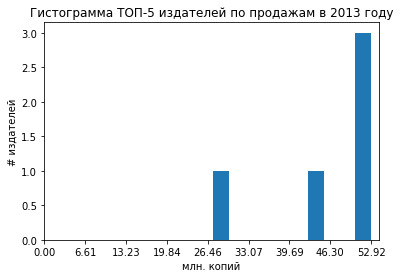

In [178]:
df6 = df[df['Year'] == 2013].groupby('Publisher')['Global_Sales'].sum().sort_values().tail(5)

bin_width = df6.max() / 8
x_range = [i * bin_width for i in range(9)]

plt.hist(df6)
plt.title('Гистограмма ТОП-5 издателей по продажам в 2013 году')
plt.ylabel('# издателей')
plt.xlabel('млн. копий')
plt.xticks(x_range)

### Задача 7

Постройте гистограмму распределения величины общемировых продаж игр, выпущенных не издателем Nintendo, в период с 2000 по 2015 год включительно. Гистограмма для большей точности должна содержать 20 столбцов, отсечки на оси X должны соответствовать границам столбцов.

([<matplotlib.axis.XTick at 0x1d0f8cbd520>,
 <a list of 21 Text major ticklabel objects>)

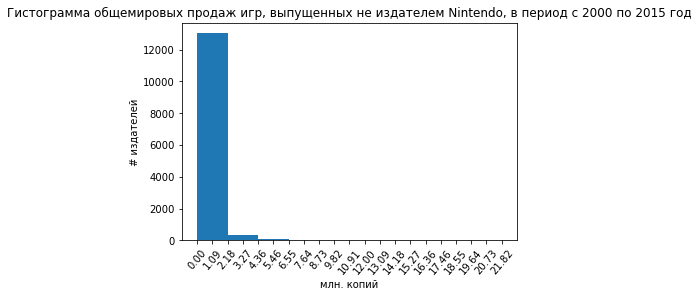

In [35]:
df7 = df[(df['Year'] >= 2000) & (df['Year'] <= 2015) & (df['Publisher'] != 'Nintendo')]
df7 = df7['Global_Sales']

bin_width = df7.max() / 20
x_range = [i * bin_width for i in range(21)]

plt.hist(df7)
plt.title('Гистограмма общемировых продаж игр, выпущенных не издателем Nintendo, в период с 2000 по 2015 год')
plt.ylabel('# издателей')
plt.xlabel('млн. копий')
plt.xticks(x_range, rotation=50)

### Задача 8

Постройте линейный график динамики суммарных мировых продаж игр жанра "Action" по годам

Text(0.5, 0, 'Год')

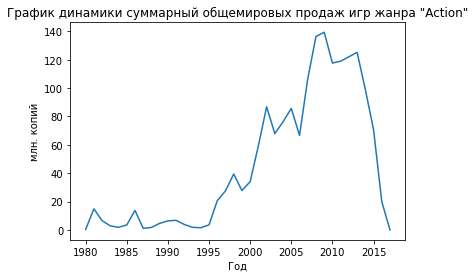

In [46]:
df8 = df[df['Genre'] == 'Action'].groupby('Year')['Global_Sales'].sum()
plt.plot(df8)
plt.title('График динамики суммарный общемировых продаж игр жанра "Action"')
plt.ylabel('млн. копий')
plt.xlabel('Год')

### Задача 9

С помощью столбчатой диаграммы проиллюстрируйте объем продаж всех игр издателя "Microsoft Game Studios" в Северной Америке за все время в зависимости от жанра. Столбцы расположите по убыванию.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

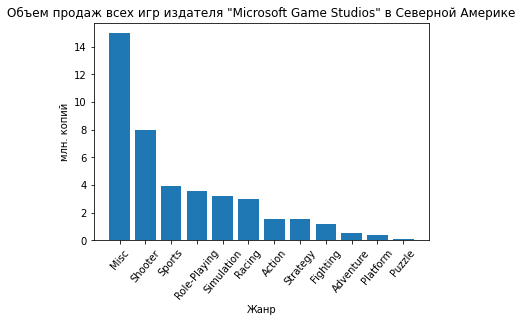

In [54]:
df9 = df[df['Publisher'] == 'Microsoft Game Studios'].sort_values('NA_Sales', ascending = False)

plt.bar(df9['Genre'], df9['NA_Sales'])

plt.title('Oбъем продаж всех игр издателя "Microsoft Game Studios" в Северной Америке')
plt.ylabel('млн. копий')
plt.xlabel('Жанр')
plt.xticks(rotation=50)

## Дополнительные (необязательные) задачи

### Задача 10

Одной из основных задач при анализе данных является проверка данных на корректность и отсутствие ошибок. В датасете "vgsales" одним из потенциальных источников ошибок является столбец с общемировыми продажами. По идее, значение общемировых продаж какой-либо игры должно равняться сумме продаж в Северной Америке, Европе, Японии и остальных странах, в противном случае мы получим ошибку в данных, которая может негативно повлиять на весь дальнейший процесс анализа.

Причин возникновения такой ошибки может быть несколько. Давайте рассмотрим следующие причины:
1. Ошибка округления. В целом, такая ошибка достаточно часто встречается при переводе величин из одних единиц в другие (например, из тысяч копий в миллионы копий).
1. Ошибка вычислений. Такая ситуация требует более серьезного исследования, поскольку она может привести к недостоверным результатам анализа данных.

Будем считать, что в записи имеется ошибка суммирования, если сумма продаж какой-либо игры в Северной Америке, Европе, Японии и остальных странах отличается от общемировых продаж более, чем на 0.01 млн копий.

С помощью круговой диаграммы проиллюстрируйте процент записей в датасете, имеющих такую ошибку суммирования продаж.

Text(0.5, 1.0, 'Соотношение верных записей и ошибками при суммировании')

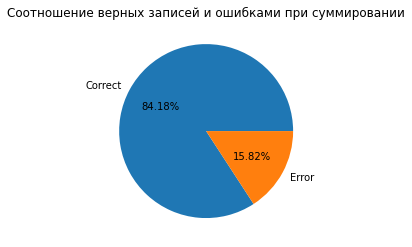

In [103]:
def f(x):
    if x > 0.01:
        return 'Error'
    else:
        return 'Correct'
    
df['Res_pie']  = abs(df.loc[:,'NA_Sales':'Other_Sales'].apply(np.sum, axis=1) - df['Global_Sales']).apply(f)

df10 = df.Res_pie.value_counts()

plt.pie(df10, labels = df10.index,autopct='%1.2f%%')
plt.title('Соотношение верных записей и ошибками при суммировании')